In [14]:
from dycoreutils import readdata_utils as read
from dycoreutils import spatialaverage_utils as spatavg
from dycoreutils import plot_utils as dycoreplt
from dycoreutils import calendar_utils as cal

import matplotlib.pyplot as plt
import numpy as np
import importlib

importlib.reload(dycoreplt)
importlib.reload(read)
importlib.reload(cal)
importlib.reload(dycoreplt)

<module 'dycoreutils.plot_utils' from '/home/islas/python/dycorediags/dycoreutils/plot_utils.py'>

In [15]:
x1, x2, y1, y2 = dycoreplt.get3by3coords()

In [22]:
basepath="/project/cas/islas/verticalresolution/"

case={"sponge5":"U_f.e21.FWscHIST.ne30_L81_tag20210203_sponge5.001.1979-01_1989-12.nc",
     "default-sponge":"U_f.e21.FWscHIST.ne30_L81_tag20210203_default-sponge.001.1979-01_1989-12.nc",
     "sponge5_marshian":"U_f.e21.FWscHIST.ne30_L83_tag20210203_sponge5-marshian.001.1979-01_1990-12.nc"}

/project/cas/islas/verticalresolution/sponge5/U_f.e21.FWscHIST.ne30_L81_tag20210203_sponge5.001.1979-01_1989-12.nc
/project/cas/islas/verticalresolution/default-sponge/U_f.e21.FWscHIST.ne30_L81_tag20210203_default-sponge.001.1979-01_1989-12.nc
/project/cas/islas/verticalresolution/sponge5_marshian/U_f.e21.FWscHIST.ne30_L83_tag20210203_sponge5-marshian.001.1979-01_1990-12.nc


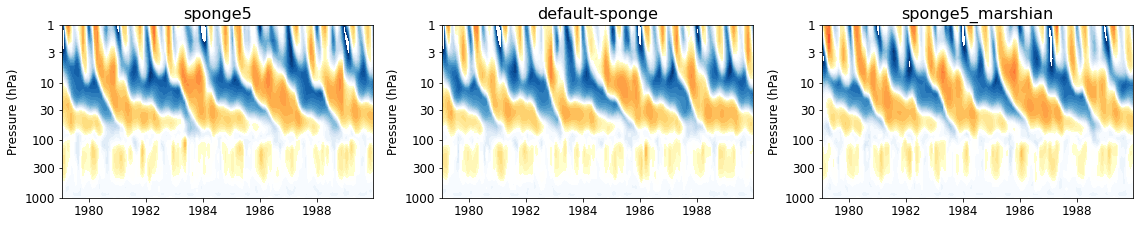

In [23]:
fig = plt.figure(figsize=(16,16))

countplot=0
for key in case:
    filename=case[key]
    fname=basepath+key+"/"+filename
    print(fname)
    uzm = read.read_cesm_zonalmean(fname,"1979-01","1989-12")
    uzm_trop = spatavg.cosweightlat(uzm,-5,5)
    time = cal.date2fracofyear_monthly(uzm.time)
    
    datplot = np.moveaxis(np.array(uzm_trop.U),1,0)
    ax = dycoreplt.plotqbowinds(fig, datplot,time,uzm.lev, 2, -40, 40, key, x1[countplot],x2[countplot],y1[countplot],y2[countplot])
    
    countplot=countplot+1

In [101]:
# sponge5
usponge5 = read.read_cesm_zonalmean("/project/cas/islas/verticalresolution/sponge5/"
                               +"U_f.e21.FWscHIST.ne30_L81_tag20210203_sponge5.001.1979-01_1989-12.nc", "1979-01", "1989-12")
usponge5_trop = spatavg.cosweightlat(usponge5,-5,5)
timesponge5 = cal.date2fracofyear_monthly(usponge5_trop.time)

In [ ]:
# default sponge5
udefaultsponge = read.read_cesm_zonalmean("/project/cas/islas/verticalresolution/default-sponge/"
                               +"U_f.e21.FWscHIST.ne30_L81_tag20210203_default-sponge.001.1979-01_1989-12.nc", "1979-01", "1989-12")
udefaultsponge_trop = spatavg.cosweightlat(udefaultsponge,-5,5)
timedefaultsponge = cal.date2fracofyear_monthly(udefaultsponge_trop.time)

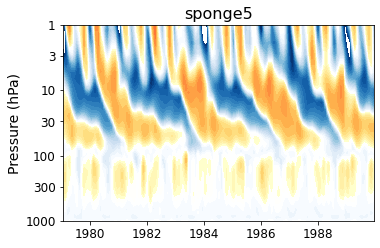

In [146]:
fig = plt.figure(figsize=(16,16))

# sponge5
datplot = np.moveaxis(np.array(usponge5_trop.U), 1, 0)
ax = dycoreplt.plotqbowinds(fig, datplot, timesponge5, usponge5.lev, 2,-40,40,'sponge5',x1[0],x2[0],0.8,0.97)